# Loan Approval Predicition Model:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random
from collections import Counter

#pd.options.display.max_rows = None
#pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data_preprocessed')
df.drop('Unnamed: 0' , axis = 1 , inplace = True)
df.head()

,Loan_ID,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
0,0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1


## --------------------------------------------------------------------------------------------------------------------------


# FEATURE ENGINEERING

## Annual Income:

In [3]:
## Creating a new feature with all NAN values replaced.....
## Applying Mean Value Imputation Technique...

df['Annual_Income_Changed'] = df['Annual_Income']
df['Annual_Income_Changed'] = df['Annual_Income_Changed'].fillna(df['Annual_Income'].mean())

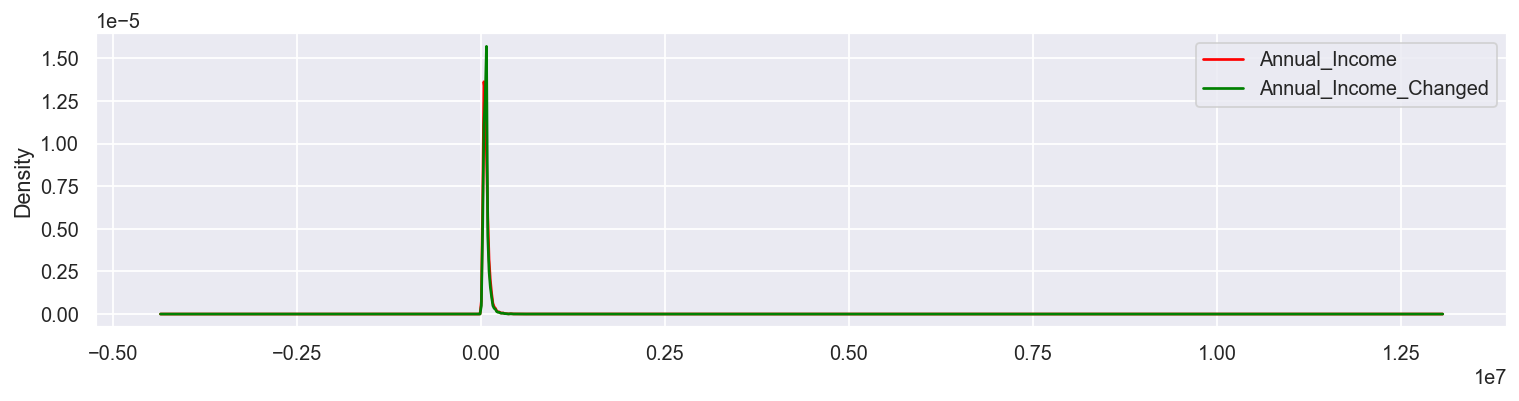

In [4]:
fig = plt.figure(dpi = 130 , figsize = (14,3))
ax = fig.add_subplot(111)
df['Annual_Income'].dropna().plot(kind = 'kde' , ax = ax , color = 'red')
df['Annual_Income_Changed'].plot(kind = 'kde' , ax = ax , color = 'green')
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels, loc = 1)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

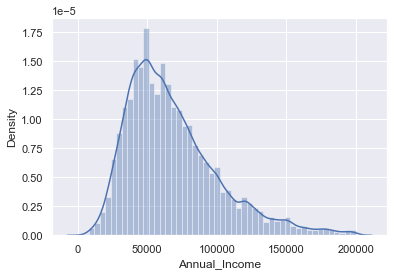

In [5]:
## Plotting for "Annual Income" records less than 2,00,000....
sns.distplot(df[df['Annual_Income'] < 200000].Annual_Income.dropna())

In [6]:
## Since there are two many Outliers above 200000, which are affecting the model making process hence we should remove them...
df = df[df['Annual_Income'] < 200000]

## Reseting the index.....
df.reset_index(drop = True  , inplace = True)

In [7]:
Counter(df['Loan_Status'])

Counter({1: 36661, 0: 11054})

## Current Loan Amount:
- Here, In "Current.Loan.Amount" feature we have 7397 NAN entries. This NAN are represented by "99999999". We need to correct this problem now.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Current_Loan_Amount'>

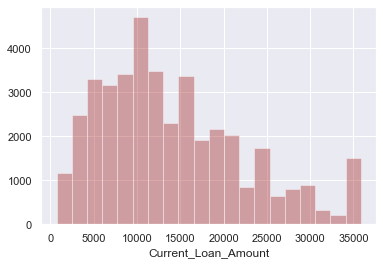

In [8]:
## Creating histogram for "Current_Loan_Amount".
sns.distplot(df[df['Current_Loan_Amount'] != 99999999].Current_Loan_Amount , kde = False , bins = 20 , color = 'brown')

#### Using Random Sample Imputation Technique

In [9]:
## Creating a Sample Series of all the entries other than '99999999'....
tempo = df[df['Current_Loan_Amount'] != 99999999]
random_entries = tempo[tempo['Loan_Status'] == 1].Current_Loan_Amount.sample(df['Current_Loan_Amount'].value_counts().max()
                                                                             , random_state=9)
random_entries.index = df[df['Current_Loan_Amount'] == 99999999].index

## Creating an array of bool dtype, 99999999 = True | Elements other than 99999999 = False
m = np.where(df['Current_Loan_Amount'].values == 99999999 , True , False )

## Changing all '99999999' with random values selected from the feature column.
df['Current_Loan_Amount_Changed'] = df['Current_Loan_Amount']
df.loc[m , 'Current_Loan_Amount_Changed'] = random_entries

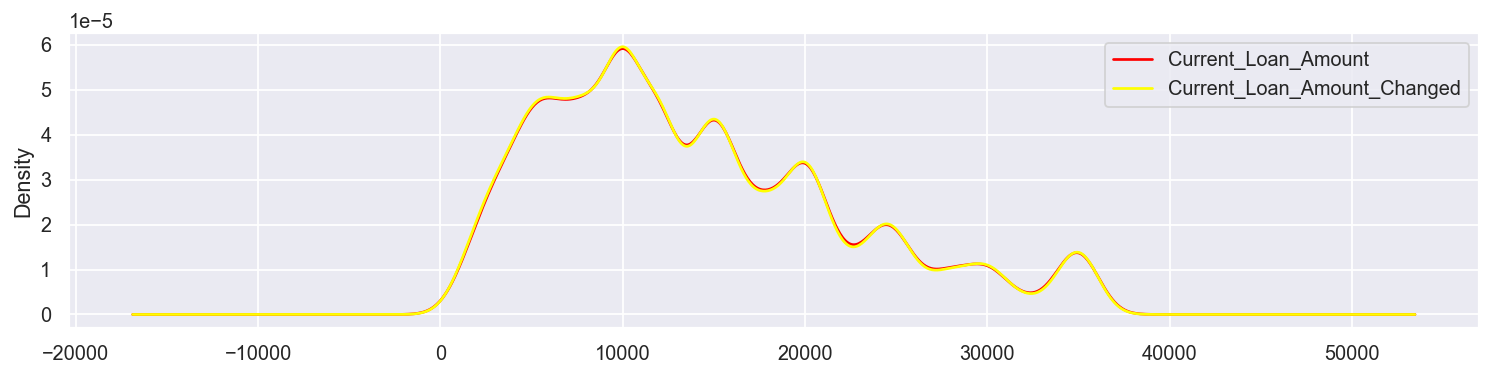

In [10]:
fig = plt.figure(dpi = 130 , figsize = (14,3))
ax = fig.add_subplot(111)
df[df['Current_Loan_Amount'] != 99999999].Current_Loan_Amount.plot(kind = 'kde' , ax = ax , color = 'red')
df['Current_Loan_Amount_Changed'].plot(kind = 'kde' , ax = ax , color = 'yellow')
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels, loc = 1)

- Now all NAN are replaced with Random Entries from the feature column. Also we got the similar variance distribution too.

## Credit Score:

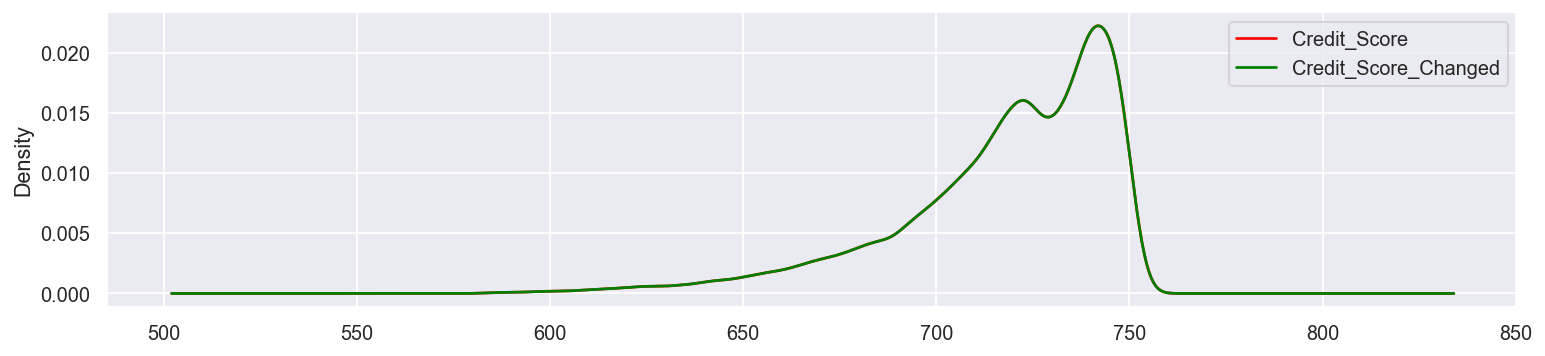

In [11]:
## Now we will apply RANDOM SAMPLE IMPUTATION to rectify NAN...
temp1 = df['Credit_Score'].dropna().sample(df['Credit_Score'].isnull().sum())
temp1.index = df[df['Credit_Score'].isnull()].index

## 'Credit_Score_Changed' is the feature with NAN replaced...
df['Credit_Score_Changed'] = df['Credit_Score']
df.loc[df['Credit_Score'].isnull() , 'Credit_Score_Changed'] = temp1 


## Checking the Variance Distribution of newly created feature - 'Credit_Score_Changed' and the old feature - 'Credit_Score' 
fig = plt.figure(dpi = 130 , figsize = (14,3))
ax = fig.add_subplot(111)
df['Credit_Score'].plot(kind = 'kde' , ax = ax , color = 'red')
df['Credit_Score_Changed'].plot(kind = 'kde' , ax = ax , color = 'green')
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels, loc = 1)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_Score_Changed', ylabel='Density'>

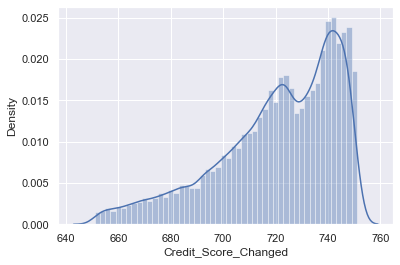

In [12]:
## Plotting for "Credit Score" records with values greater than 650....
sns.distplot(df[df['Credit_Score_Changed'] > 650].Credit_Score_Changed.dropna())

In [13]:
## Since there are two many Outliers above 650, which are affecting the model making process hence we should remove them...
df = df[df['Credit_Score_Changed'] > 650]

## Reseting the index.....
df.reset_index(drop = True  , inplace = True)

## Purpose:


    - Combining some categories like "Business Loan" , "Buy House" , "Medical Bills", "major_purchase" and "small_business"  because these categories have some correlation with respect to the fact that the Loans are taken for High Capital Investment.
    - There are some Categories which can also be combined togther like : "Other" , "Take a Trip" , "moving" ,  "Educational Expenses" , "vacation" , "wedding" , "renewable_energy". All these category are very arbitrary and don't have any serious trend, so we can have one sepearte category for this.

#### **Now we have 4 categories:**

- Category 1: Debt Consolidation
- Category 2: High Capital = "Business Loan" + "Buy House" + "Medical Bills" + "major_purchase" + "small_business" 
- Category 3: Arbitrary Purpose = "Other" + "Take a Trip" + "moving" + "Educational Expenses" + "vacation" + "wedding" + "renewable_energy" + 'Buy a Car'
- Category 4: Home Improvements

In [14]:
## Creating a sepearte Feature with above Changes....
df['Purpose_Changed'] = df['Purpose']

df['Purpose_Changed'].replace(("Business Loan" , "Buy House" , "Medical Bills" , "major_purchase" , "small_business")
                              , 'High Capital' , inplace = True)

df['Purpose_Changed'].replace(("Other" , "Take a Trip" , "moving" , "Educational Expenses" , "vacation" , "wedding" , 
                               "renewable_energy" , 'Buy a Car') , 'Arbitrary Purpose' , inplace = True)


temp = pd.DataFrame({'Count' : df['Purpose_Changed'].value_counts() , 
                     'Percentage of Loan Approved' : df.groupby(['Purpose_Changed']).Loan_Status.mean()}
                    , index = df['Purpose_Changed'].value_counts().index)
temp

,Count,Percentage of Loan Approved
Debt Consolidation,36465,0.771562
Arbitrary Purpose,5343,0.789070
Home Improvements,2599,0.796845
High Capital,1720,0.736628


In [15]:
## We can use Probability Imputation technique.....

cate_count = dict(df['Purpose_Changed'].value_counts()/df.shape[0])
cate = list(cate_count.keys())
values = list(cate_count.values())

for i in range(len(cate_count.keys())):
    df['Purpose_Changed'].replace(cate[i]  , values[i] , inplace = True)

## Home Ownership :

In [16]:
## Creating dummy variables to represent "Home_Ownership" Categories....
Home_Ownership_dummy = pd.get_dummies(df['Home_Ownership'] , drop_first = True , prefix='Home_Ownership', prefix_sep='/')
df = pd.concat([df,Home_Ownership_dummy] , axis = 1)

## Term:

In [17]:
## Creating dummy variables to represent "Term" Categories....
Term_dummy = pd.get_dummies(df['Term'] , drop_first = True , prefix='Term', prefix_sep='->')
df = pd.concat([df,Term_dummy] , axis = 1)

## Years in Current Job :

In [18]:
## Selecting top 4 most occuring elements in the feature....
sample_temp = list(df['Years_in_current_job'].value_counts().head(4).index)

## Creating the sample for imputation in NAN places....
sample = random.choices(sample_temp, weights = [2, 1, 1, 1], k = df['Years_in_current_job'].isnull().sum())
## Converting List to Series....
sample = pd.Series(sample)

## Matching index of all NAN position with the "sample" Series
sample.index = df[df['Years_in_current_job'].isnull()].index

## Imputing "sample" data in the main feature....
df.loc[df['Years_in_current_job'].isnull() , 'Years_in_current_job'] = sample

In [19]:
## pairing different entries.....
cate_1 = ['less than  1 year' , '1 year' , '2 years', '3 years']
cate_2 = ['4 years', '5 years' , '6 years' , '7 years']
cate_3 = ['8 years', '9 years' , '10+ years']


for i in cate_1:
    df['Years_in_current_job'].replace(i , 'cate_1' , inplace = True)
for i in cate_2:
    df['Years_in_current_job'].replace(i , 'cate_2' , inplace = True)
for i in cate_3:
    df['Years_in_current_job'].replace(i , 'cate_3' , inplace = True)

In [20]:
df["Years_in_current_job"].value_counts()

cate_3    19099
cate_1    15904
cate_2    11124
Name: Years_in_current_job, dtype: int64

In [21]:
## Creating dummy variables to represent "Years_in_current_job" Categories....
Years_in_current_job_dummy = pd.get_dummies(df['Years_in_current_job'] , drop_first = True , 
                                            prefix='Years_in_current_job', prefix_sep='->')
df = pd.concat([df,Years_in_current_job_dummy] , axis = 1)

## Months Since Last Delinquent :

In [22]:
## Finding Pearson's Correlation Coef....
print("Coef. of Correlation between 'Months_since_last_delinquent' and 'Loan_Status' is :" , 
      round(df['Loan_Status'].corr(df['Months_since_last_delinquent'])*100 , 3) , "%")

Coef. of Correlation between 'Months_since_last_delinquent' and 'Loan_Status' is : 2.014 %


In [23]:
## Due to very low Corr Coef. and very Large number of NAN values in 'Months_since_last_delinquent'.....
## We should better drop the feature....
df = df.drop(['Months_since_last_delinquent'] , axis = 1)

## Bankruptcies :

In [24]:
## since, "0" is the most highly occuring value in the feature "Bankruptcies"....
## we can better fill all NAN with "0" value....
df['Bankruptcies'].fillna("0" , inplace = True)

## Tax Liens :

In [25]:
## since, "0" is the most highly occuring value in the feature "Tax_Liens"....
## we can better fill all NAN with "0" value....
df['Tax_Liens'].fillna("0" , inplace = True)

## --------------------------------------------------------------------------------------------------------------------------


### Dropping all unwanted columns :

In [26]:
df.drop(['Loan_ID', 'Current_Loan_Amount', 'Term', 'Credit_Score', 'Years_in_current_job', 'Home_Ownership', 
 'Annual_Income', 'Purpose' , 'Purpose_Changed'] , axis = 1 , inplace = True)

## NOW are dat frame is ready and now we can prepare the ML Model.....

## --------------------------------------------------------------------------------------------------------------------------


### Feature Selection:


In [27]:
from sklearn.feature_selection import f_regression

## Calculating P Values for each Features....
f_val , p_val = f_regression(df.drop('Loan_Status' , axis = 1) , df['Loan_Status'])

p_val_table = pd.DataFrame(data = p_val.round(3) , columns = ['P Values'] , 
                           index = df.drop('Loan_Status' , axis = 1).columns.values)     

p_val_table.sort_values(by = 'P Values' , ascending = False).head(10)

,P Values
Home_Ownership/Own Home,0.862
Years_in_current_job->cate_2,0.810
Current_Credit_Balance,0.566
Maximum_Open_Credit,0.283
Number_of_Credit_Problems,0.198
Tax_Liens,0.160
Years_in_current_job->cate_3,0.143
Monthly_Debt,0.003
Bankruptcies,0.001
Years_of_Credit_History,0.000


In [28]:
## Creating the list for Features with P values less more than 0.05....
## These features can be drop here....
drop = []

for i in range(len(p_val)):
    ## Filtering features with respect to P Values....
    if p_val[i] > 0.05:
        drop.append(df.drop('Loan_Status' , axis = 1).columns.values[i])
    else:
        pass

print(drop)       

['Number_of_Credit_Problems', 'Current_Credit_Balance', 'Maximum_Open_Credit', 'Tax_Liens', 'Home_Ownership/Own Home', 'Years_in_current_job->cate_2', 'Years_in_current_job->cate_3']


In [29]:
## Droppinf all selected features in "drop"....
df.drop(drop , axis = 1 , inplace = True)

## --------------------------------------------------------------------------------------------------------------------------


## Feature Scaling:

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('Loan_Status' , axis = 1))

input_scaled = scaler.transform(df.drop('Loan_Status' , axis = 1))

In [31]:
## Creating dataframe of all scaled feartures....
input_df = pd.DataFrame(data = input_scaled , columns = df.drop('Loan_Status' , axis = 1).columns.values)

## --------------------------------------------------------------------------------------------------------------------------


#### Apply Model Selection:

In [222]:
from sklearn.model_selection import train_test_split
## Splitting the dataset in two halves:
## 1. Train Set
## 2. Test Set
x_train , x_test , y_train , y_test  = train_test_split(input_df , df['Loan_Status'] , random_state = 55 , test_size = 0.25)


In [223]:
Counter(y_train) , Counter(y_test)

(Counter({0: 7770, 1: 26825}), Counter({1: 8864, 0: 2668}))

## --------------------------------------------------------------------------------------------------------------------------


## Model:

#### Using Logistic Regression as Classifier:

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [226]:
## Using Logistic Regression as Classifier.....
logreg = LogisticRegression()
logreg.fit(x_train , y_train)

LogisticRegression()

In [227]:
y_train_pred = logreg.predict(x_train)

## Creating confusion matrix...
print(pd.DataFrame(metrics.confusion_matrix(y_train , y_train_pred)))

   0      1
0  1   7769
1  0  26825


In [228]:
print("Accuracy of the model :" , metrics.accuracy_score(y_train , y_train_pred)*100 , "%")
print("Recall Score of the model :" , metrics.recall_score(y_train , y_train_pred)*100 , "%")
print("Precision Score of the model :" , metrics.precision_score(y_train , y_train_pred)*100 , "%\n\n")
print(metrics.classification_report(y_train , y_train_pred))

Accuracy of the model : 77.54299754299754 %
Recall Score of the model : 100.0 %
Precision Score of the model : 77.54234838411284 %


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      7770
           1       0.78      1.00      0.87     26825

    accuracy                           0.78     34595
   macro avg       0.89      0.50      0.44     34595
weighted avg       0.83      0.78      0.68     34595



In [229]:
## Predicting for test set.....
print(pd.DataFrame(metrics.confusion_matrix(y_test , logreg.predict(x_test))))

   0     1
0  1  2667
1  0  8864


In [230]:
print("TEST Accuracy of the model :" , metrics.accuracy_score(y_test , logreg.predict(x_test))*100 , "%")
print("TEST Recall Score of the model :" , metrics.recall_score(y_test , logreg.predict(x_test))*100 , "%")
print("TEST Precision Score of the model :" , metrics.precision_score(y_test , logreg.predict(x_test))*100 , "%\n\n")
print(metrics.classification_report(y_test , logreg.predict(x_test)))

TEST Accuracy of the model : 76.87304890738814 %
TEST Recall Score of the model : 100.0 %
TEST Precision Score of the model : 76.87104327465094 %


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2668
           1       0.77      1.00      0.87      8864

    accuracy                           0.77     11532
   macro avg       0.88      0.50      0.43     11532
weighted avg       0.82      0.77      0.67     11532



##### We can see how badly Logistic Regression Failed in predicting the test dataset.....
- We lost Precision Score and Recall Score for predicting "0" - Loan Status.

#### Using Decision Tree as Classifier :

In [231]:
## Using Decision Tree as Classifier.....
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DTclf = DecisionTreeClassifier(criterion='gini', max_depth=None , random_state = 0)
## Fitting with train dataset....
DTclf.fit(x_train , y_train)

## Predicting train data targets.....
y_clf_pred = DTclf.predict(x_train)

## Creating Confusion Matrix.....                
print("Training Confusion Matrix:\n" , pd.DataFrame(metrics.confusion_matrix(y_train , y_clf_pred)))

## Accuracy of train prediction....
print("\nTraining Accuracy Score:" , metrics.accuracy_score(y_train , y_clf_pred)*100 , "%")

Training Confusion Matrix:
       0      1
0  7770      0
1     0  26825

Training Accuracy Score: 100.0 %


In [232]:
## Finding the DEPTH and No. of LEAF NODES of the Tree....
DTclf.get_depth() , DTclf.get_n_leaves()  

(37, 6863)

In [54]:
## Finding the right depth of the tree......
## This can be estimated by analyzing corresponding accuracy score change with train and test dataset....

accuracy_train = []
accuracy_test = []

for i in range(1,100):
    DTclf = DecisionTreeClassifier(criterion='gini', max_depth=i )
    DTclf.fit(x_train , y_train)
    accuracy_train.append(DTclf.score(x_train , y_train))
    accuracy_test.append(metrics.accuracy_score(y_test , DTclf.predict(x_test)))

Text(0.5, 1.0, 'Max Depth VS Test Accuracy')

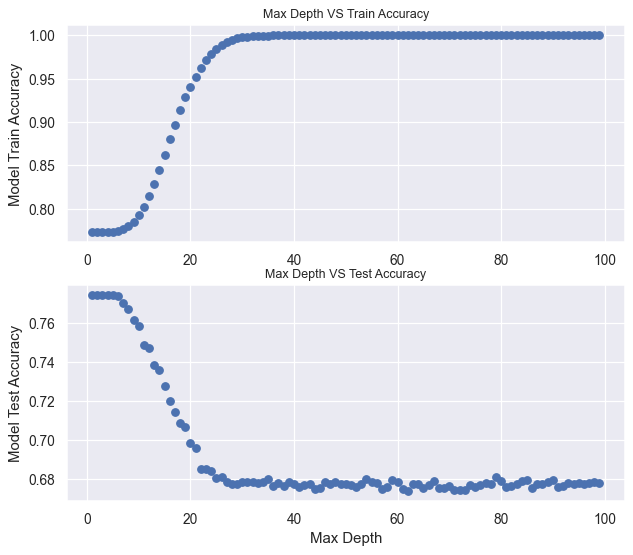

In [55]:
plt.figure(dpi = 90 , figsize = (8,7))
plt.subplot(2,1,1)
plt.scatter(range(1,100) , accuracy_train)
plt.ylabel("Model Train Accuracy")
plt.title("Max Depth VS Train Accuracy" , fontsize = 10)
plt.subplot(2,1,2)
plt.scatter(range(1,100) , accuracy_test)
plt.xlabel("Max Depth")
plt.ylabel("Model Test Accuracy")
plt.title("Max Depth VS Test Accuracy" , fontsize = 10)

In [233]:
## With the help of above plot we can recreate the tree....
## Creating the Decision Tree with MAX DEPTH of 5.....

DTclf = DecisionTreeClassifier(criterion='gini', max_depth=5 , random_state = 100)
## Fitting with train dataset....
DTclf.fit(x_train , y_train)

## Predicting train data targets.....
y_clf_pred = DTclf.predict(x_train)

## Creating Confusion Matrix.....                
print("Train Confusion Matrix:\n" , pd.DataFrame(metrics.confusion_matrix(y_train , y_clf_pred)))

## Accuracy of train prediction....
print("\Train Accuracy Score:" , metrics.accuracy_score(y_train , y_clf_pred)*100 , "%")

Train Confusion Matrix:
     0      1
0  33   7737
1  29  26796
\Train Accuracy Score: 77.5516693163752 %


In [234]:
## Predicting test data set and creating Confusion Matrix for Test Data set.....
metrics.confusion_matrix(y_test , DTclf.predict(x_test))

array([[   5, 2663],
       [  21, 8843]], dtype=int64)

In [235]:
## Accuracy of Test prediction....
metrics.accuracy_score(y_test , DTclf.predict(x_test))

0.7672563302115851

#### Using Random Forest as Classifier :

In [236]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_jobs = -1 , random_state= 45)

rf_model.fit(x_train , y_train)

## Accuracy of train prediction....
print("The Train accuracy is :" , rf_model.score(x_train , y_train))

## Creating Confusion Matrix.....                
print("\nThe Confuion Matrix for Training Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y_train , 
                                                                                              rf_model.predict(x_train))))

The Train accuracy is : 1.0

The Confuion Matrix for Training Data is :
       0      1
0  7770      0
1     0  26825


In [237]:
print("The Test accuracy is :" , metrics.accuracy_score(y_test , rf_model.predict(x_test)))

print("\nThe Confuion Matrix for Test Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y_test , 
                                                                                           rf_model.predict(x_test))))   

The Test accuracy is : 0.7669961845300035

The Confuion Matrix for Test Data is :
      0     1
0  162  2506
1  181  8683


#### Using Gradient Boosting as Classifier :

In [238]:
from sklearn.ensemble import GradientBoostingClassifier
rf_model = GradientBoostingClassifier(random_state= 45)

rf_model.fit(x_train , y_train)

## Accuracy_train of train prediction....
print("The Train accuracy_train is :" , rf_model.score(x_train , y_train))

## Creating Confusion Matrix_train.....                
print("\nThe Confuion Matrix for Training Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y_train , 
                                                                                              rf_model.predict(x_train))))

The Train accuracy_train is : 0.7761815291227055

The Confuion Matrix for Training Data is :
     0      1
0  43   7727
1  16  26809


In [239]:
print("The Test accuracy_train is :" , metrics.accuracy_score(y_test , rf_model.predict(x_test)))

print("\nThe Confuion Matrix for Test Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y_test , 
                                                                                           rf_model.predict(x_test))))   

The Test accuracy_train is : 0.7688172043010753

The Confuion Matrix for Test Data is :
     0     1
0  10  2658
1   8  8856


#### Using XGBoost as Classifier :

In [240]:
from xgboost import XGBClassifier
rf_model = XGBClassifier(random_state= 45)

rf_model.fit(x_train , y_train)

## Accuracy_train of train prediction....
print("The Train accuracy_train is :" , rf_model.score(x_train , y_train))

## Creating Confusion Matrix_train.....                
print("\nThe Confuion Matrix_train for Training Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y_train , 
                                                                                              rf_model.predict(x_train))))

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Train accuracy_train is : 0.8146263910969793

The Confuion Matrix_train for Training Data is :
       0      1
0  1458   6312
1   101  26724


In [172]:
print("The Test accuracy_train is :" , metrics.accuracy_score(y_test , rf_model.predict(x_test)))

print("\nThe Confuion Matrix_train for Test Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y_test , 
                                                                                           rf_model.predict(x_test))))   

The Test accuracy_train is : 0.7675164758931668

The Confuion Matrix_train for Test Data is :
      0     1
0  130  2467
1  214  8721


### ----------------------------------------------------------------------------------------------------------------------------------------

## Balancing the Dataset :

In [193]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 55)

x , y = sm.fit_resample(x_train , y_train)

In [194]:
Counter(y) , Counter(y_train)

(Counter({1: 26754, 0: 26754}), Counter({1: 26754, 0: 7841}))

#### Using Logistic Regression as Classifier:

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [196]:
## Using Logistic Regression as Classifier.....
logreg = LogisticRegression()
logreg.fit(x , y)

LogisticRegression()

In [197]:
y_pred = logreg.predict(x)

## Creating confusion matrix...
print(pd.DataFrame(metrics.confusion_matrix(y , y_pred)))

       0      1
0  16198  10556
1  11314  15440


In [198]:
print("Accuracy of the model :" , metrics.accuracy_score(y , y_pred)*100 , "%")
print("Recall Score of the model :" , metrics.recall_score(y , y_pred)*100 , "%")
print("Precision Score of the model :" , metrics.precision_score(y , y_pred)*100 , "%\n\n")
print(metrics.classification_report(y , y_pred))

Accuracy of the model : 59.12760708679075 %
Recall Score of the model : 57.710996486506694 %
Precision Score of the model : 59.393752885059236 %


              precision    recall  f1-score   support

           0       0.59      0.61      0.60     26754
           1       0.59      0.58      0.59     26754

    accuracy                           0.59     53508
   macro avg       0.59      0.59      0.59     53508
weighted avg       0.59      0.59      0.59     53508



In [199]:
## Predicting for test set.....
print(pd.DataFrame(metrics.confusion_matrix(y_test , logreg.predict(x_test))))

      0     1
0  1535  1062
1  3811  5124


In [200]:
print("TEST Accuracy of the model :" , metrics.accuracy_score(y_test , logreg.predict(x_test))*100 , "%")
print("TEST Recall Score of the model :" , metrics.recall_score(y_test , logreg.predict(x_test))*100 , "%")
print("TEST Precision Score of the model :" , metrics.precision_score(y_test , logreg.predict(x_test))*100 , "%\n\n")
print(metrics.classification_report(y_test , logreg.predict(x_test)))

TEST Accuracy of the model : 57.74366978841484 %
TEST Recall Score of the model : 57.34750979294908 %
TEST Precision Score of the model : 82.83220174587778 %


              precision    recall  f1-score   support

           0       0.29      0.59      0.39      2597
           1       0.83      0.57      0.68      8935

    accuracy                           0.58     11532
   macro avg       0.56      0.58      0.53     11532
weighted avg       0.71      0.58      0.61     11532



##### We can see how badly Logistic Regression Failed in predicting the test dataset.....
- We lost Precision Score and Recall Score for predicting "0" - Loan Status.

#### Using Decision Tree as Classifier :

In [201]:
## Using Decision Tree as Classifier.....
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DTclf = DecisionTreeClassifier(criterion='gini', max_depth=None , random_state = 0)
## Fitting with train dataset....
DTclf.fit(x , y)

## Predicting train data targets.....
y_clf_pred = DTclf.predict(x)

## Creating Confusion Matrix.....                
print("Training Confusion Matrix:\n" , pd.DataFrame(metrics.confusion_matrix(y , y_clf_pred)))

## Accuracy of train prediction....
print("\nTraining Accuracy Score:" , metrics.accuracy_score(y , y_clf_pred)*100 , "%")

Training Confusion Matrix:
        0      1
0  26754      0
1      0  26754

Training Accuracy Score: 100.0 %


In [202]:
## Finding the DEPTH and No. of LEAF NODES of the Tree....
DTclf.get_depth() , DTclf.get_n_leaves()  

(65, 8164)

In [203]:
## Finding the right depth of the tree......
## This can be estimated by analyzing corresponding accuracy score change with train and test dataset....

accuracy = []
accuracy_test = []

for i in range(1,100):
    DTclf = DecisionTreeClassifier(criterion='gini', max_depth=i )
    DTclf.fit(x , y)
    accuracy.append(DTclf.score(x , y))
    accuracy_test.append(metrics.accuracy_score(y_test , DTclf.predict(x_test)))

Text(0.5, 1.0, 'Max Depth VS Test Accuracy')

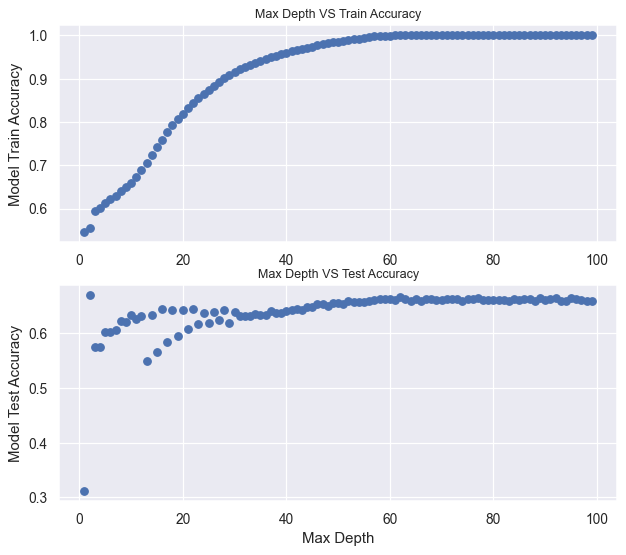

In [204]:
plt.figure(dpi = 90 , figsize = (8,7))
plt.subplot(2,1,1)
plt.scatter(range(1,100) , accuracy)
plt.ylabel("Model Train Accuracy")
plt.title("Max Depth VS Train Accuracy" , fontsize = 10)
plt.subplot(2,1,2)
plt.scatter(range(1,100) , accuracy_test)
plt.xlabel("Max Depth")
plt.ylabel("Model Test Accuracy")
plt.title("Max Depth VS Test Accuracy" , fontsize = 10)

In [214]:
## With the help of above plot we can recreate the tree....
## Creating the Decision Tree with MAX DEPTH of 60.....

DTclf = DecisionTreeClassifier(criterion='gini', max_depth=60 , random_state = 100)
## Fitting with train dataset....
DTclf.fit(x , y)

## Predicting train data targets.....
y_clf_pred = DTclf.predict(x)

## Creating Confusion Matrix.....                
print("Train Confusion Matrix:\n" , pd.DataFrame(metrics.confusion_matrix(y , y_clf_pred)))

## Accuracy of train prediction....
print("\Train Accuracy Score:" , metrics.accuracy_score(y , y_clf_pred)*100 , "%")

Train Confusion Matrix:
        0      1
0  26739     15
1     17  26737
\Train Accuracy Score: 99.94019585856321 %


In [215]:
## Predicting test data set and creating Confusion Matrix for Test Data set.....
metrics.confusion_matrix(y_test , DTclf.predict(x_test))

array([[ 861, 1736],
       [2140, 6795]], dtype=int64)

In [216]:
## Accuracy of Test prediction....
metrics.accuracy_score(y_test , DTclf.predict(x_test))

0.663891779396462

#### Using Random Forest as Classifier :

In [208]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_jobs = -1 , random_state= 45)

rf_model.fit(x , y)

## Accuracy of train prediction....
print("The Train accuracy is :" , rf_model.score(x , y))

## Creating Confusion Matrix.....                
print("\nThe Confuion Matrix for Training Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y , 
                                                                                              rf_model.predict(x))))

The Train accuracy is : 1.0

The Confuion Matrix for Training Data is :
        0      1
0  26754      0
1      0  26754


In [209]:
print("The Test accuracy is :" , metrics.accuracy_score(y_test , rf_model.predict(x_test)))

print("\nThe Confuion Matrix for Test Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y_test , 
                                                                                           rf_model.predict(x_test))))   

The Test accuracy is : 0.7252861602497399

The Confuion Matrix for Test Data is :
       0     1
0   725  1872
1  1296  7639


#### Using Gradient Boosting as Classifier :

In [210]:
from sklearn.ensemble import GradientBoostingClassifier
rf_model = GradientBoostingClassifier(random_state= 45)

rf_model.fit(x , y)

## Accuracy of train prediction....
print("The Train accuracy is :" , rf_model.score(x , y))

## Creating Confusion Matrix.....                
print("\nThe Confuion Matrix for Training Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y , 
                                                                                              rf_model.predict(x))))

The Train accuracy is : 0.7633437990580848

The Confuion Matrix for Training Data is :
        0      1
0  19433   7321
1   5342  21412


In [211]:
print("The Test accuracy is :" , metrics.accuracy_score(y_test , rf_model.predict(x_test)))

print("\nThe Confuion Matrix for Test Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y_test , 
                                                                                           rf_model.predict(x_test))))   

The Test accuracy is : 0.6958029830038155

The Confuion Matrix for Test Data is :
       0     1
0   923  1674
1  1834  7101


#### Using XGBoost as Classifier :

In [212]:
from xgboost import XGBClassifier
rf_model = XGBClassifier(random_state= 45)

rf_model.fit(x , y)

## Accuracy of train prediction....
print("The Train accuracy is :" , rf_model.score(x , y))

## Creating Confusion Matrix.....                
print("\nThe Confuion Matrix for Training Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y , 
                                                                                              rf_model.predict(x))))

[12:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The Train accuracy is : 0.8668610301263362

The Confuion Matrix for Training Data is :
        0      1
0  20528   6226
1    898  25856


In [213]:
print("The Test accuracy is :" , metrics.accuracy_score(y_test , rf_model.predict(x_test)))

print("\nThe Confuion Matrix for Test Data is :\n" , pd.DataFrame(metrics.confusion_matrix(y_test , 
                                                                                           rf_model.predict(x_test))))   

The Test accuracy is : 0.7565036420395421

The Confuion Matrix for Test Data is :
      0     1
0  367  2230
1  578  8357
